<a href="https://colab.research.google.com/github/Maassoo/BigMart-Sales-Analysis-and-Prediction/blob/main/Mini_project_Big_Mart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install cartopy
import cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 57.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 65.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 5.6 MB/s eta 0:00:00
  Created wheel for cartopy: filename=Cartopy-0.21.1-cp310-cp310-linux_x86_64.whl size=11102764 sha256=ea13c01d5d81c58617ae9405ff1ba5f669ce975e4e4c86399ae2ae744957ab9b
  Stored in directory: /root/.cache/pip/wheels/30/b0/1a/1c1909e00c76653dc4e2ff48555257c0eb2d1698280c8d9955
Successfully built cartopy


In [2]:
!apt-get -qq install -y graphviz && pip install pydot
import pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 122518 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.4.0-2ubuntu1.2_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.4.0-2ubuntu1.2) ...
Setting up libarchive-dev:amd64 (3.4.0-2ubuntu1.2) ...
Processing triggers for man-db (2.9.1-1) ...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 16.6 MB/s eta 0:00:00
  Created wheel for libarchive: filename=libarchive-0.4.7-py3-none-any.whl size=31644 sha256=61b60c5205874e0ff7dff38fb7cb1dad11de1c3d29253add514aa12ba8f9cfcc
  Stored in directory: /root/.cache/pip/wheels/3a/94/d0/6cd83c8a80a4236fd4cb2a1fd846ecf72ab1e0ac238c5951c0
Successfully built libarchive


In [4]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [5]:
!pip install matplotlib-venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
# from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn import metrics 
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [7]:
data=pd.read_csv("/content/Train.csv")
data_test=pd.read_csv("/content/Test.csv")

In [8]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [10]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [11]:
data.shape

(8523, 12)

In [12]:
data_test.shape

(5681, 11)

Show nulls and handling it in train and test data


In [13]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
data_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [15]:
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0],inplace=True)

In [16]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace=True)

In [17]:
data_test['Outlet_Size'].fillna(data_test['Outlet_Size'].mode()[0],inplace=True)

In [18]:
data_test['Item_Weight'].fillna(data_test['Item_Weight'].mean(),inplace=True)

In [19]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [20]:
data_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

label_encoding 


In [21]:
data["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [22]:
data_test["Item_Fat_Content"].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [23]:
data['Item_Fat_Content'].replace(['low fat',  'LF','reg'],
                        ['Low Fat', 'Low Fat','Regular'], inplace=True)

data_test['Item_Fat_Content'].replace(['low fat',  'LF','reg'],
                        ['Low Fat', 'Low Fat','Regular'], inplace=True)

data['Item_Fat_Content'].unique()
data_test['Item_Fat_Content'].unique()


array(['Low Fat', 'Regular'], dtype=object)

In [28]:
fornum = preprocessing.LabelEncoder()
data['Item_Fat_Content']= fornum.fit_transform(data['Item_Fat_Content'])
data['Item_Fat_Content'].unique()


array([0, 1])

In [29]:
data["Item_Type"].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [30]:
data['Item_Type']= fornum.fit_transform(data['Item_Type'])
data['Item_Type'].unique()

array([ 4, 14, 10,  6,  9,  0, 13,  5,  2,  8,  7,  3,  1, 15, 11, 12])

In [31]:
data["Outlet_Identifier"].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [32]:
data['Outlet_Identifier']= fornum.fit_transform(data['Outlet_Identifier'])
data['Outlet_Identifier'].unique()

array([9, 3, 0, 1, 5, 7, 2, 8, 6, 4])

In [33]:
data["Outlet_Size"].unique()


array(['Medium', 'High', 'Small'], dtype=object)

In [34]:
data['Outlet_Size']= fornum.fit_transform(data['Outlet_Size'])
data['Outlet_Size'].unique()

array([1, 0, 2])

In [35]:
data["Outlet_Location_Type"].unique()


array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [36]:
data['Outlet_Location_Type']= fornum.fit_transform(data['Outlet_Location_Type'])
data['Outlet_Location_Type'].unique()

array([0, 2, 1])

In [37]:
data["Outlet_Type"].unique()


array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [38]:
data['Outlet_Type']= fornum.fit_transform(data['Outlet_Type'])
data['Outlet_Type'].unique()

array([1, 2, 0, 3])

In [39]:
data["Item_Identifier"].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [40]:
data['Item_Identifier']= fornum.fit_transform(data['Item_Identifier'])
data['Item_Identifier'].unique()

array([ 156,    8,  662, ..., 1323, 1524, 1519])

In [41]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int64  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int64  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int64  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int64  
 9   Outlet_Location_Type       8523 non-null   int64  
 10  Outlet_Type                8523 non-null   int64  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 799.2 KB


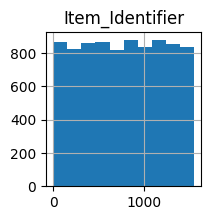

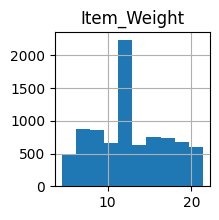

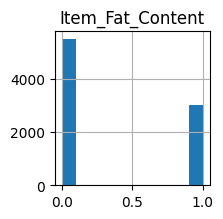

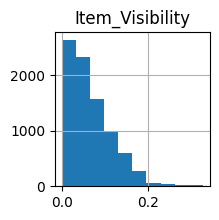

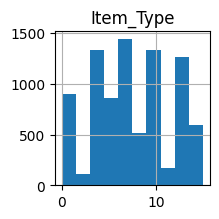

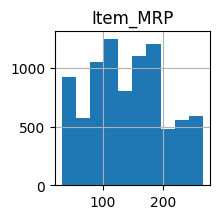

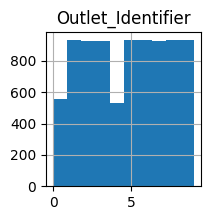

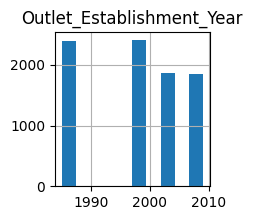

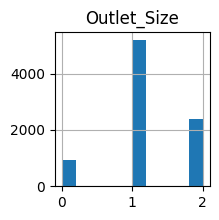

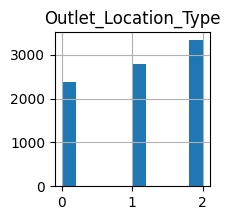

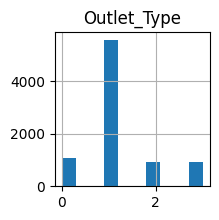

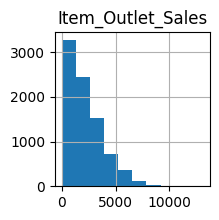

In [42]:
for col in data.columns:
    fig = plt.figure(figsize=(2,2))
    plt.title(f"{col}")
    data[col].hist()

<Axes: >

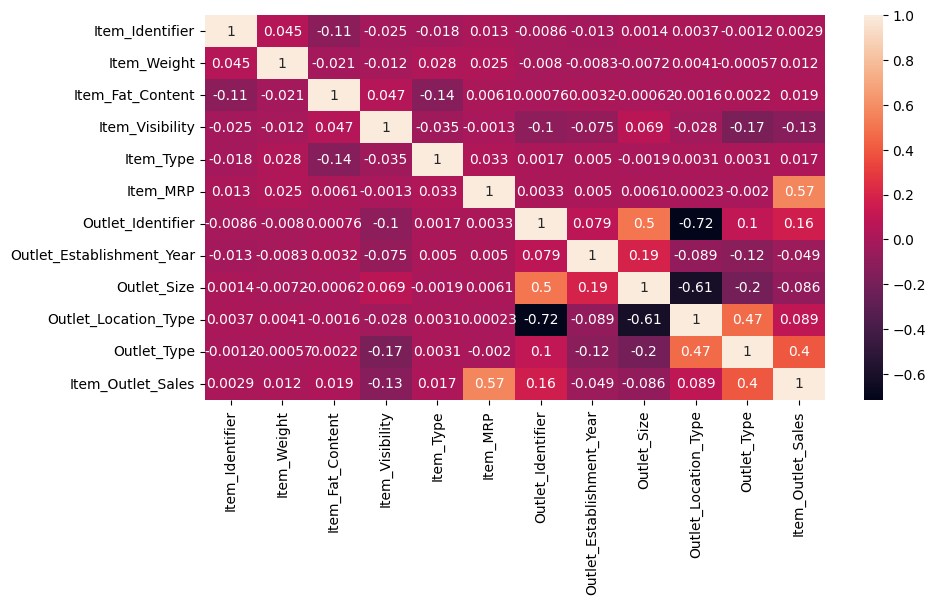

In [43]:
plt.subplots(figsize=(10,5))
sns.heatmap(data.corr(),annot=True)

In [44]:
#Showing the uncorrelated features 
def correlation(data,threshold):
  col_corr=set()
  corr_matrix=data.corr()
  for i in range(len(corr_matrix.columns)):
   for j in range(i):
      if abs(corr_matrix.iloc[i,j])>threshold:
       colname=corr_matrix.columns[i]
       col_corr.add(colname)
  return col_corr

In [45]:
costing_features =correlation(data,0.015)
costing_features 

{'Item_Fat_Content',
 'Item_MRP',
 'Item_Outlet_Sales',
 'Item_Type',
 'Item_Visibility',
 'Item_Weight',
 'Outlet_Establishment_Year',
 'Outlet_Identifier',
 'Outlet_Location_Type',
 'Outlet_Size',
 'Outlet_Type'}

In [46]:
 data.drop(['Item_Identifier'],axis=1,inplace=True)


<Axes: >

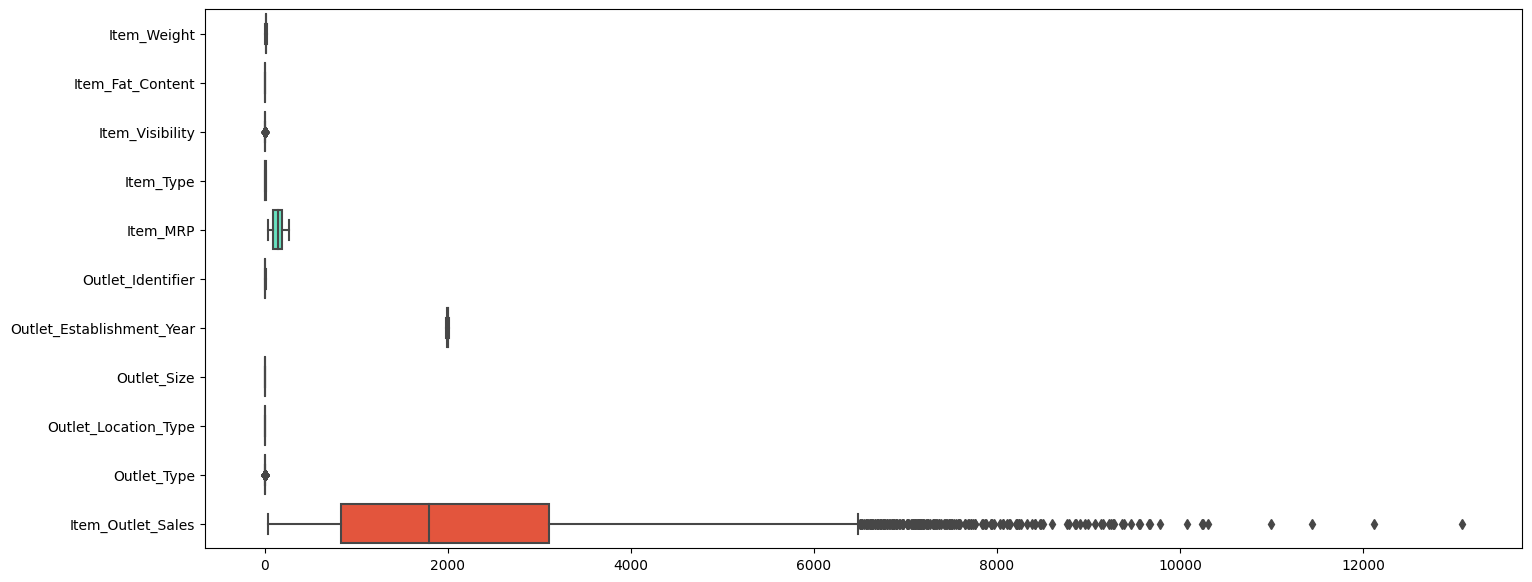

In [47]:
plt.subplots(figsize=(17,7))
sns.boxplot(data=data,palette='rainbow',orient='h')

Text(0.5, 0, 'Item_Visibility')

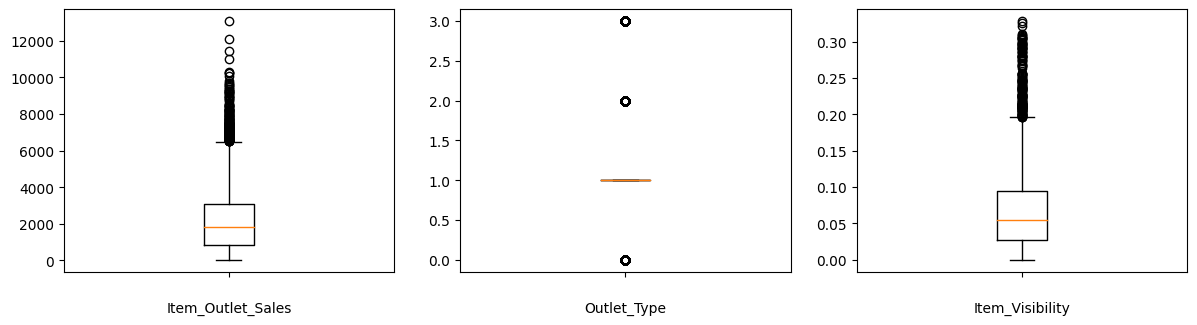

In [48]:
plt.rcParams["figure.figsize"] = [14.50, 7.50]
plt.subplot(231)
plt.boxplot(data['Item_Outlet_Sales'],labels=' ');
plt.xlabel('Item_Outlet_Sales')
plt.subplot(232)
plt.boxplot(data['Outlet_Type'],labels=' ');
plt.xlabel('Outlet_Type')
plt.subplot(233)
plt.boxplot(data['Item_Visibility'],labels=' ');
plt.xlabel('Item_Visibility')



In [49]:
#Let's try get ride of outliers!
for x in ['Item_Outlet_Sales','Item_Visibility']:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
  
    data.loc[data[x] > max,x] = max


Text(0.5, 0, 'Item_Visibility')

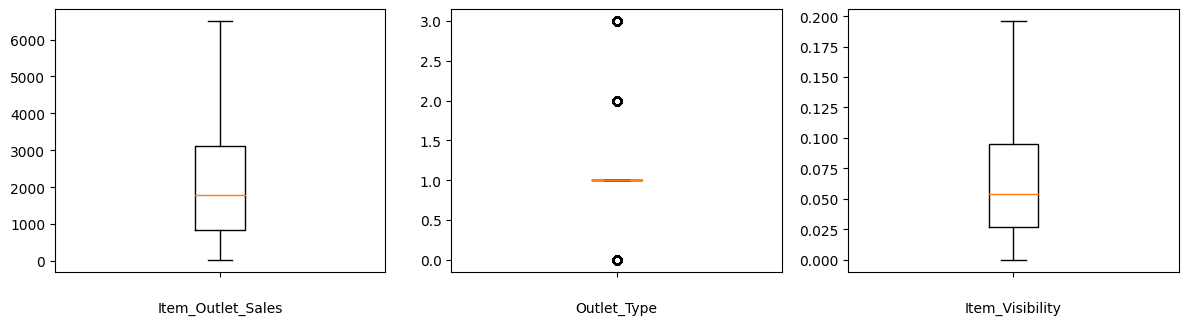

In [50]:
plt.rcParams["figure.figsize"] = [14.50, 7.50]
plt.subplot(231)
plt.boxplot(data['Item_Outlet_Sales'],labels=' ');
plt.xlabel('Item_Outlet_Sales')
plt.subplot(232)
plt.boxplot(data['Outlet_Type'],labels=' ');
plt.xlabel('Outlet_Type')
plt.subplot(233)
plt.boxplot(data['Item_Visibility'],labels=' ');
plt.xlabel('Item_Visibility')



<Axes: >

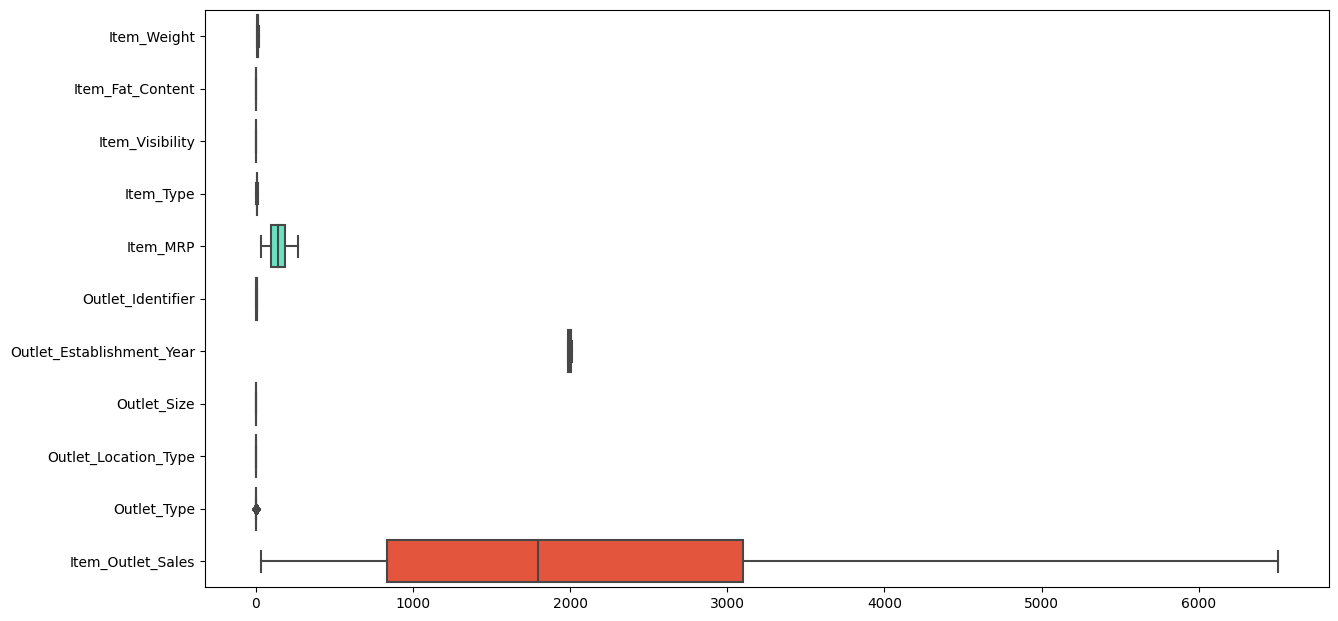

In [51]:
sns.boxplot(data=data,palette='rainbow',orient='h')

In [52]:
data.duplicated().sum()

0

In [53]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [ ]:
sns.pairplot(data,hue='Item_Outlet_Sales',palette='coolwarm')

In [ ]:
sns.pairplot(
    data,
    x_vars=['Item_Fat_Content',
 'Item_MRP',
 'Item_Type',
 'Item_Visibility',
 'Item_Weight',
 'Outlet_Establishment_Year',
 'Outlet_Identifier',
 'Outlet_Location_Type',
 'Outlet_Size',
 'Outlet_Type'],
    y_vars=["Item_Outlet_Sales"],hue='Item_Outlet_Sales',
    palette='coolwarm'
)

In [ ]:
import plotly.express as ex
ex.pie(data,names='Outlet_Type',hole=0.20,width=500,height=500)

In [ ]:
ex.pie(data,names='Outlet_Size',hole=0.20,width=500,height=500)

In [ ]:
ex.pie(data,names='Outlet_Location_Type',hole=0.20,width=500,height=500)

In [ ]:
plt.subplots(figsize=(5,5))
sns.distplot(data['Item_Outlet_Sales'])

In [ ]:
data.describe()

In [ ]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
 
dataset = load_iris()
object= StandardScaler()
 
# Splitting the independent and dependent variables
i_data = dataset.data
response = dataset.target
 
# standardization 
scale = object.fit_transform(i_data) 
print(scale)

In [ ]:
object = StandardScaler()
object.fit_transform(data)

In [ ]:
X=data.drop(["Item_Outlet_Sales"],axis=1)
Y=data["Item_Outlet_Sales"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.24, random_state = 35)

**Linear Regression**

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print("MSE:",metrics.mean_squared_error(y_pred,y_test))
print("MAE:",metrics.mean_absolute_error(y_pred,y_test))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_pred,y_test)))
print("r2_score:",metrics.r2_score(y_pred,y_test))

In [ ]:
regressor.score(X_train,y_train)

In [ ]:
print(regressor.score(X_test, y_test))


**Regularized Linear Regression**

In [ ]:
ridge=Ridge(alpha=3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

In [ ]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

In [ ]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

In [ ]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

**Random Forest Regressor**

In [ ]:
RFR_model=RandomForestRegressor(n_estimators=100,random_state=1)
RFR_model.fit(X_train, y_train)

In [ ]:
RFR_model_prediction = RFR_model.predict(X_test)


In [ ]:
print("MSE:",mean_squared_error(RFR_model_prediction,y_test))
print("MAE:",metrics.mean_absolute_error(RFR_model_prediction,y_test))
print("RMSE:",np.sqrt(metrics.mean_squared_error(RFR_model_prediction,y_test)))
print("r2_score:",metrics.r2_score(RFR_model_prediction,y_test))

In [ ]:
RFR_model.score(X_test, y_test)

**XGB model**

In [ ]:
#  create XGB model
xgb_reg = xgb.XGBRegressor(max_depth=3, n_estimators=100, n_jobs=2,
                           objectvie='reg:squarederror', booster='gbtree',
                           random_state=42, learning_rate=0.05)

# fit the model to the data
xgb_reg.fit(X_train, y_train)

In [ ]:
xgb_reg_prediction = xgb_reg.predict(X_test)
print("MSE:",mean_squared_error(xgb_reg_prediction,y_test))
print("MAE:",metrics.mean_absolute_error(xgb_reg_prediction,y_test))
print("RMSE:",np.sqrt(metrics.mean_squared_error(xgb_reg_prediction,y_test)))
print("r2_score:",metrics.r2_score(xgb_reg_prediction,y_test))

In [ ]:
xgb_reg.score(X_test, y_test)

**Saving The Final Model**

In [ ]:
#Saving the model Random Forest Regressor
import pickle
filename = '/content/Test.csv'
pickle.dump(RFR_model, open(filename, 'wb'))
# loading the saved model
loaded_model = pickle.load(open('/content/Test.csv', 'rb'))
